In [1]:
#Import Libraries 
import pandas as pd 

In [2]:
#Read CSV
raw_data = pd.read_csv('Week 8 - vgsales.csv')
print(raw_data)

        Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
1          2                                  Super Mario Bros.      NES   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
4          5                           Pokemon Red/Pokemon Blue       GB   
5          6                                             Tetris       GB   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
8          9                          New Super Mario Bros. Wii      Wii   
9         10                                          Duck Hunt      NES   
10        11                                         Nintendogs       DS   
11        12                                      Mario Kart DS       DS   
12        13

In [3]:
#Create Function
def best_seller(df, agg_col):
    #reset index to allow iloc
    best_seller_df = df.groupby('Genre')[agg_col].mean().reset_index()
    best_seller_df = best_seller_df.sort_values(agg_col, ascending=False)
    return best_seller_df

In [4]:
#Apply the Function 
best_selling_na = best_seller(raw_data, 'NA_Sales')
best_selling_eu = best_seller(raw_data, 'EU_Sales')
best_selling_jp = best_seller(raw_data, 'JP_Sales')

In [5]:
#Return a statement depicting the top genre
print("the best selling genre in NA is {}".format(best_selling_na.iloc[0,0]))
print("the best selling genre in EU is {}".format(best_selling_eu.iloc[0,0]))
print("the best selling genre in JP is {}".format(best_selling_jp.iloc[0,0]))

the best selling genre in NA is Platform
the best selling genre in EU is Shooter
the best selling genre in JP is Role-Playing


In [6]:
#Create Function
def best_seller_plat(df, agg_col):
    #reset index to allow iloc
    best_seller_plat = df.groupby('Platform')[agg_col].mean().reset_index()
    best_seller_plat = best_seller_plat.sort_values(agg_col, ascending=False)
    return best_seller_plat

In [7]:
#Apply the Function 
best_selling_na_plat = best_seller_plat(raw_data, 'NA_Sales')
best_selling_eu_plat = best_seller_plat(raw_data, 'EU_Sales')
best_selling_jp_plat = best_seller_plat(raw_data, 'JP_Sales')

In [8]:
#Return a statement depicting the top genre
print("the best selling platform in NA is {}".format(best_selling_na_plat.iloc[0,0]))
print("the best selling platform in EU is {}".format(best_selling_eu_plat.iloc[0,0]))
print("the best selling platform in JP is {}".format(best_selling_jp_plat.iloc[0,0]))

the best selling platform in NA is NES
the best selling platform in EU is GB
the best selling platform in JP is NES


In [13]:
cod_rows = raw_data[raw_data['Name'].str.contains("Call of Duty")]
print(cod_rows)

        Rank                                          Name Platform    Year  \
29        30                Call of Duty: Modern Warfare 3     X360  2011.0   
31        32                       Call of Duty: Black Ops     X360  2010.0   
33        34                     Call of Duty: Black Ops 3      PS4  2015.0   
34        35                    Call of Duty: Black Ops II      PS3  2012.0   
35        36                    Call of Duty: Black Ops II     X360  2012.0   
36        37                Call of Duty: Modern Warfare 2     X360  2009.0   
37        38                Call of Duty: Modern Warfare 3      PS3  2011.0   
40        41                       Call of Duty: Black Ops      PS3  2010.0   
55        56                Call of Duty: Modern Warfare 2      PS3  2009.0   
61        62                          Call of Duty: Ghosts     X360  2013.0   
67        68                          Call of Duty: Ghosts      PS3  2013.0   
70        71                Call of Duty 4: Modern W

In [14]:
#Extract columns and sort them
cod_rows_stuff = cod_rows[['Platform','Name', 'NA_Sales']]
print(cod_rows_stuff.sort_values("NA_Sales", ascending=False))

      Platform                                          Name  NA_Sales
31        X360                       Call of Duty: Black Ops      9.67
29        X360                Call of Duty: Modern Warfare 3      9.03
36        X360                Call of Duty: Modern Warfare 2      8.52
35        X360                    Call of Duty: Black Ops II      8.25
61        X360                          Call of Duty: Ghosts      6.72
40         PS3                       Call of Duty: Black Ops      5.98
70        X360                Call of Duty 4: Modern Warfare      5.91
33         PS4                     Call of Duty: Black Ops 3      5.77
37         PS3                Call of Duty: Modern Warfare 3      5.54
34         PS3                    Call of Duty: Black Ops II      4.99
55         PS3                Call of Duty: Modern Warfare 2      4.99
98        X360                    Call of Duty: World at War      4.79
101       XOne                     Call of Duty: Black Ops 3      4.52
67    

In [17]:
def grouped_data_cod(data):
    rev_by_platform = data.groupby ("Platform")["NA_Sales"].sum()
    rev_by_platform = rev_by_platform.reset_index()
    rev_by_platform = rev_by_platform.sort_values ("NA_Sales", ascending=False)
    rev_by_platform = rev_by_platform.reset_index()
    rev_by_platform = rev_by_platform.drop('index', 1) 
    return rev_by_platform

In [18]:
cod_df = grouped_data_cod(cod_rows_stuff)
print(cod_df)

   Platform  NA_Sales
0      X360     60.11
1       PS3     34.04
2       PS4     10.35
3      XOne      9.60
4       Wii      4.76
5       PS2      3.01
6        DS      2.65
7        PC      2.02
8       PSV      0.80
9        XB      0.78
10      PSP      0.52
11     WiiU      0.44
12       GC      0.31


In [15]:
#Import Library
import matplotlib.pyplot as plt 

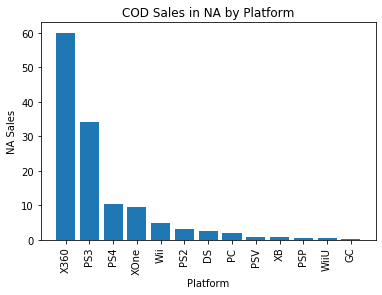

In [19]:
#Chart characteristics
fig, ax = plt.subplots()
ax.bar(x=cod_df.Platform,height=cod_df.NA_Sales)
plt.title('COD Sales in NA by Platform')
plt.xticks(rotation='vertical')
plt.xlabel('Platform')
plt.ylabel('NA Sales')
plt.show()